In [1]:
# list of movies on Wikipedia from 1990 to 2018 - 28 years - 7311 movies - 240 movies per year - 5 movies per week

In [2]:
# expand jupyter notebook cell width to 100% of window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import json
import pandas as pd
import numpy as np
import json
import re

In [4]:
file_dir = 'c://Users//bjile//Documents//UT_data_analytics//A_Classwork//Module8//Movies-ETL'

# wiki_movies_raw: 7311 movies (rows)

In [5]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [6]:
print(len(wiki_movies_raw))

7311


In [7]:
# first 5 rows
#wiki_movies_raw[:5]

In [8]:
# last 5 rows
#wiki_movies_raw[-5:]
#print(json.dumps(wiki_movies_raw[-5:], indent=4, sort_keys=True))

In [9]:
# 5 rows in middle
#print(json.dumps(wiki_movies_raw[3600:3605], indent=4, sort_keys=False))

# kaggle_metadata_df

In [10]:
kaggle_metadata_df = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv(f'{file_dir}/ratings.csv')

In [11]:
#kaggle_metadata_df.head()

In [12]:
#kaggle_metadata_df.tail()

In [13]:
# randomly select 5 rows
#kaggle_metadata_df.sample(n=5)

In [14]:
#ratings_df.head()

In [15]:
#ratings_df.tail()

In [16]:
#ratings_df.sample(n=5)

In [17]:
#kaggle_metadata_df.info()

In [18]:
#ratings_df.info()

## wiki_movies_df: Create DataFrame from wikipedia JSON data: 193 columns

In [134]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
#wiki_movies_df.head(5)

In [20]:
print(len(wiki_movies_df.columns.tolist()))

193


In [21]:
col_list = wiki_movies_df.columns.tolist()
col_list.sort()
#col_list

### wiki_movies_list: (('Director' or 'Directed by') and 'imdb_link') 7080 rows x 193 cols

In [22]:
wiki_movies_list = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies_list)

7080

In [23]:
len(wiki_movies_df.columns)

193

## wiki_movies2_df: Create Datafrom from movies_list 7080 rows x 78 cols

In [24]:
wiki_movies2_df = pd.DataFrame(wiki_movies_list)
len(wiki_movies_list)

7080

In [25]:
col2_list = wiki_movies2_df.columns.tolist()
print(len(col2_list))

78


In [26]:
col2_list.sort()
#col2_list

### wiki_movies2_list: same as wiki_movies_list, but *MINUS* 'No. of episodes'

In [27]:
wiki_movies2_list = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [28]:
#wiki_movies2_df[wiki_movies2_df['Arabic'].notnull()]

In [29]:
#wiki_movies2_df[wiki_movies2_df['McCune–Reischauer'].notnull()]

# clean_movie()

In [30]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [31]:
clean_movies3_list = [clean_movie(movie) for movie in wiki_movies2_list]

In [32]:
#clean_movies3_list

In [33]:
wiki_movies3_df = pd.DataFrame(clean_movies3_list)
#sorted(wiki_movies3_df.columns.tolist())

In [34]:
print(len(sorted(wiki_movies3_df.columns.tolist())))

56


# clean_movie2()

In [35]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
        # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [36]:
clean_movies4_list = [clean_movie(movie) for movie in wiki_movies2_list]

## wiki_movies5_df: Create Datafrom from movies2_list 7076 rows x 39 cols

In [37]:
print(len(clean_movies4_list))

7076


In [38]:
wiki_movies5_df = pd.DataFrame(clean_movies4_list)

In [39]:
#sorted(wiki_movies5_df.columns.tolist())
print(len(sorted(wiki_movies5_df.columns.tolist())))

39


# Create imdb_id column

In [40]:
wiki_movies5_df['imdb_id'] = wiki_movies5_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies5_df))
wiki_movies5_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies5_df))
wiki_movies5_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


### show non-null value counts

In [41]:
wiki_movies5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   url                     7033 non-null   object
 1   year                    7033 non-null   int64 
 2   imdb_link               7033 non-null   object
 3   title                   7032 non-null   object
 4   Based on                2181 non-null   object
 5   Starring                6849 non-null   object
 6   Narrated by             281 non-null    object
 7   Cinematography          6342 non-null   object
 8   Release date            7001 non-null   object
 9   Running time            6894 non-null   object
 10  Country                 6797 non-null   object
 11  Language                6789 non-null   object
 12  Budget                  4738 non-null   object
 13  Box office              5485 non-null   object
 14  Director                7033 non-null   object
 15  Dist

### show null value counts

In [42]:
[[column,wiki_movies5_df[column].isnull().sum()] for column in wiki_movies5_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

# wiki_movies6_df

### columns we want to keep (columns that have less than 90% null values)

In [43]:
wiki_columns_to_keep = [column for column in wiki_movies5_df.columns if wiki_movies5_df[column].isnull().sum() < len(wiki_movies5_df) * 0.9]
wiki_movies6_df = wiki_movies5_df[wiki_columns_to_keep]

In [44]:
print(len(wiki_movies6_df))

7033


In [45]:
print(len(sorted(wiki_movies6_df.columns.tolist())))

21


In [46]:
wiki_movies6_df.head(5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [47]:
wiki_movies6_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

# convert text to (numeric for 'Budget', 'Box office', 'Running time'),  (date for 'Release date')

In [48]:
box_office = wiki_movies6_df['Box office'].dropna()
print(len(box_office))

5485


In [49]:
def is_not_a_string(x):
    return type(x) != str

### without a lambda expression

In [50]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

### with a lambda expression: box_office has 5485 rows: 135 are not strings (those are all lists)

In [51]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [52]:
len(box_office)

5485

In [53]:
len(box_office[box_office.map(lambda x: type(x) == list)])

135

In [54]:
len(box_office[box_office.map(lambda x: type(x) != list)])

5350

### with lambda and str.join(list) BS

In [55]:
box_office2 = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [56]:
box_office2[box_office2.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [57]:
print(len(box_office2))

5485


## regex foo - These counts match module 8.3.10 text: form1=3896, form2=1544 - 47 rows don't match

In [58]:
#try1: do-not-use
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office2.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [59]:
# try1: do-not-use
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office2.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [60]:
matches_form_one = box_office2.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office2.str.contains(form_two, flags=re.IGNORECASE)
# this will throw an error!
#box_office2[(not matches_form_one) and (not matches_form_two)]
# this one won't
box_office2[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

## form1 = 3903, form2 = 1559 19 rows don't match now???

In [64]:
# try2: optional space between $ and \d+
#form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
# try3: account for mispelling 'millon (no 'i')'
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office2.str.contains(form_one, flags=re.IGNORECASE).sum()

3903

In [65]:
# try2: optional space between $ and \d+
#form_two = r'\$\s*\d{1,3}(?:,\d{3})+'
# try3: period instead of comma as thousands separator
#form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'
# try4: negative lookahed for [mb]illion so we don't match things like $1.234 billion here
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
box_office2.str.contains(form_two, flags=re.IGNORECASE).sum()

1559

In [66]:
# convert the form ''$41.8-41.9 million' to just ''$41.9 million'
# the char class contains hyphen, m-dash, and n-dash (supposedly)
box_office3 = box_office2.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [67]:
matches_form_one = box_office3.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office3.str.contains(form_two, flags=re.IGNORECASE)
# this will throw an error!
#box_office2[(not matches_form_one) and (not matches_form_two)]
# this one won't
box_office3[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [162]:
box_office3.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


# parse_dollars()

In [181]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)
        # convert to float
        value = float(s)
        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

# Use parse_dollars() to reformat 'box_office' column values

# --------------------------------------------------------------------------------

In [182]:
wiki_movies6_df.dtypes

url                              object
year                              int64
imdb_link                        object
title                            object
Based on                         object
Starring                         object
Cinematography                   object
Release date                     object
Country                          object
Language                         object
Director                         object
Distributor                      object
Editor(s)                        object
Composer(s)                      object
Producer(s)                      object
Production company(s)            object
Writer(s)                        object
imdb_id                          object
box_office                       object
budget                          float64
release_date             datetime64[ns]
running_time                    float64
dtype: object

In [185]:
#wiki_movies6_df['box_office'] = box_office3.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
#wiki_movies6_df['box_office']
#wiki_movies6_df['box_office'] = box_office3.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0] #.apply(parse_dollars)
# foo = box_office3.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0] #.apply(parse_dollars)
# print(type(foo))
# bar = wiki_movies6_df['box_office']
# print(type(bar))
baz = wiki_movies6_df['box_office'] = box_office3.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
print(type(baz))

<class 'pandas.core.series.Series'>


C:\Users\bjile\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [186]:
wiki_movies6_df['box_office']

0             21,400,000.00
1              2,700,000.00
2             57,718,089.00
3              7,331,647.00
4              6,939,946.00
               ...         
7071          41,900,000.00
7072          76,100,000.00
7073          38,400,000.00
7074           5,500,000.00
7075                    nan
Name: box_office, Length: 7033, dtype: float64

In [74]:
wiki_movies6_df['box_office'][7071:7076]

Series([], Name: box_office, dtype: float64)

In [75]:
wiki_movies6_df.drop('Box office', axis=1, inplace=True)

C:\Users\bjile\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
foo = sorted(wiki_movies6_df.columns.tolist())
foo

['Based on',
 'Budget',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Running time',
 'Starring',
 'Writer(s)',
 'box_office',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

## We just dropped the 'Box office' column in previous step, but we still have the new 'box_office' col

In [77]:
budget = wiki_movies6_df['Budget'].dropna()

In [187]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [78]:
budget2 = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [79]:
budget3 = budget2.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [80]:
bud_matches_form_one = budget3.str.contains(form_one, flags=re.IGNORECASE)
bud_matches_form_two = budget3.str.contains(form_two, flags=re.IGNORECASE)
budget4 = budget3[~bud_matches_form_one & ~bud_matches_form_two]
budget4

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

### Remove citation references - results in 32 rows (29 unique) -- NOT 30 !!!

In [201]:
budget5 = budget4.str.replace(r'\[\d+\]\s*', '')
bud5_matches_form_one = budget5.str.contains(form_one, flags=re.IGNORECASE)
bud5_matches_form_two = budget5.str.contains(form_two, flags=re.IGNORECASE)
budget6 = budget5[~bud5_matches_form_one & ~bud5_matches_form_two]
budget6

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [202]:
budget6

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [82]:
foo = sorted(wiki_movies6_df.columns.tolist())
foo

['Based on',
 'Budget',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Running time',
 'Starring',
 'Writer(s)',
 'box_office',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

### What happened here? The budget column became all-nan

In [197]:
#budget6.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
# bud6_matches_form_one = budget6.str.contains(form_one, flags=re.IGNORECASE)
# bud6_matches_form_two = budget6.str.contains(form_two, flags=re.IGNORECASE)
# budget6.str.extract(f'({bud6_matches_form_one}|{bud6_matches_form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


136                     nan
204                     nan
478                     nan
1226                    nan
1278                    nan
1374                    nan
1397                    nan
1480                    nan
1734                    nan
1913                    nan
1948                    nan
1953                    nan
1973                    nan
2281                    nan
2451                    nan
3144                    nan
3418                    nan
3802                    nan
3906                    nan
3959                    nan
4470                    nan
4641                    nan
5424                    nan
5447                    nan
5671                    nan
5687                    nan
6385                    nan
6593                    nan
6821                    nan
6843                    nan
6895                    nan
7070                    nan
Name: 0, dtype: float64

In [205]:
wiki_movies6_df['budget'] = budget5.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

C:\Users\bjile\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [206]:
wiki_movies6_df['budget']

0                       nan
1                       nan
2                       nan
3                       nan
4                       nan
               ...         
7071                    nan
7072                    nan
7073                    nan
7074                    nan
7075                    nan
Name: budget, Length: 7033, dtype: float64

In [149]:
foo = sorted(wiki_movies6_df.columns.tolist())
foo

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Starring',
 'Writer(s)',
 'box_office',
 'budget',
 'imdb_id',
 'imdb_link',
 'release_date',
 'running_time',
 'title',
 'url',
 'year']

# Drop 'Budget' column (but we still have the new 'budget' col)

In [85]:
wiki_movies6_df.drop('Budget', axis=1, inplace=True)

In [148]:
wiki_movies6_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,"21,400,000.00",nan,1990-07-11,102.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,English,...,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,"2,700,000.00",nan,1990-05-17,114.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,"[English, Lao]",...,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,"57,718,089.00",nan,1990-08-10,113.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,English,...,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,"7,331,647.00",nan,1990-12-25,106.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,English,...,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,"6,939,946.00",nan,1990-12-19,95.00


## Parse Release Date

In [86]:
release_date = wiki_movies6_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [87]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [88]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


## Create new 'release_date' col

In [89]:
wiki_movies6_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

C:\Users\bjile\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
wiki_movies6_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-01-01
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

## Parse Running Time

In [92]:
running_time = wiki_movies6_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [93]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [94]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [95]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [96]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [97]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [98]:
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [99]:
running_time_extract2 = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [100]:
running_time_extract2

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [101]:
wiki_movies6_df['running_time'] = running_time_extract2.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

C:\Users\bjile\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
wiki_movies6_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

## drop 'Running time' but we still have new 'running_time' col

In [103]:
wiki_movies6_df.drop('Running time', axis=1, inplace=True)

C:\Users\bjile\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 8.3.12 Clean the Kaggle Data - kaggle_metadata_df

In [104]:
kaggle_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [105]:
kaggle_metadata_df['release_date'].head(5)

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [106]:
kaggle_metadata_df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [107]:
kaggle_metadata_df[~kaggle_metadata_df['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
kaggle_metadata_df = kaggle_metadata_df[kaggle_metadata_df['adult'] == 'False'].drop('adult',axis='columns')

In [109]:
kaggle_metadata_df['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [110]:
kaggle_metadata_df['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [111]:
kaggle_metadata_df['video'] = kaggle_metadata_df['video'] == 'True'

In [112]:
kaggle_metadata_df['budget'].head(5)

0    30000000
1    65000000
2           0
3    16000000
4           0
Name: budget, dtype: object

In [113]:
kaggle_metadata_df['id'].head(5)

0      862
1     8844
2    15602
3    31357
4    11862
Name: id, dtype: object

In [114]:
kaggle_metadata_df['popularity'].head(5)

0    21.946943
1    17.015539
2      11.7129
3     3.859495
4     8.387519
Name: popularity, dtype: object

In [115]:
kaggle_metadata_df['budget'] = kaggle_metadata_df['budget'].astype(int)
kaggle_metadata_df['id'] = pd.to_numeric(kaggle_metadata_df['id'], errors='raise')
kaggle_metadata_df['popularity'] = pd.to_numeric(kaggle_metadata_df['popularity'], errors='raise')

In [116]:
kaggle_metadata_df['release_date'] = pd.to_datetime(kaggle_metadata_df['release_date'])

# 8.3.12 Clean the Kaggle Data - ratings_df

In [117]:
ratings_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [118]:
pd.to_datetime(ratings_df['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [119]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

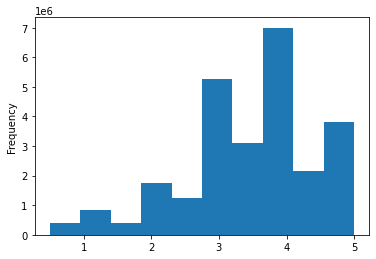

In [120]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings_df['rating'].plot(kind='hist')
ratings_df['rating'].describe()

# 8.4.1 Merge Wikipedia and Kaggle Metadata

In [135]:
movies_df = pd.merge(wiki_movies6_df, kaggle_metadata_df, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [136]:
foo = sorted(movies_df.columns.to_list())
foo

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'title_wiki',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

## competing columns after merge of wki vs kaggle

In [ ]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop wikipedia
# running_time             runtime                  Keep Kaggle; fill in zeros with Wikipedia data.
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [137]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [138]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [139]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [147]:
movies_df[['budget_wiki', 'budget_kaggle']]

,budget_wiki,budget_kaggle
0,nan,49000000
1,nan,0
2,nan,0
3,nan,0
4,nan,0
...,...,...
6047,nan,0
6048,nan,0
6049,nan,0
6050,nan,0


## Drop title_wiki, keep title_kaggle

In [140]:
movies2_df = movies_df.drop('title_wiki', axis=1)

In [141]:
foo = sorted(movies_df.columns.to_list())
foo

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'title_wiki',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

In [142]:
foo = sorted(movies2_df.columns.to_list())
foo

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

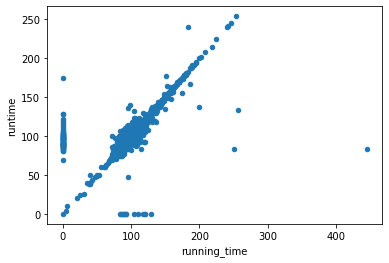

In [143]:
movies2_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

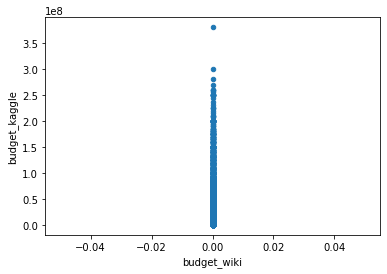

In [144]:
movies2_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [145]:
movies3_df = movies_df

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

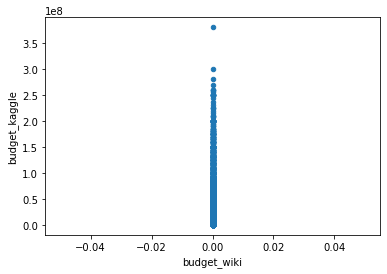

In [146]:
movies3_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')